In [1]:
# import internal files
import emulators
import sample
import historymatch
import plot

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 10})

import importlib
import time

In [2]:
ndim = 4

In [3]:
# define parameter space

#theta_0_vals = np.linspace(parameter_bounds[0,0], parameter_bounds[0,1], 100)
#theta_1_vals = np.linspace(parameter_bounds[1,0], parameter_bounds[1,1], 100)
#theta_2_vals = np.linspace(parameter_bounds[2,0], parameter_bounds[2,1], 100)

#theta_vals = np.concatenate((theta_0_vals.reshape(1,-1), theta_1_vals.reshape(1,-1), theta_2_vals.reshape(1,-1)), axis=0)

In [4]:
#parameter_bounds = np.ones((ndim,2))
#parameter_bounds[:,0] = -1*parameter_bounds[:,0]
#parameter_bounds[:,1] = 2*parameter_bounds[:,1]

# for 5D
parameter_bounds = np.ones((ndim,2))
parameter_bounds[:,0] = -1
parameter_bounds[:,1] = 1

In [5]:
Nx = 8
x_bound = np.array([0.1, 1])
xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

def toy_model6D(theta_1, theta_2, theta_3, theta_4, theta_5, theta_6):
    
    x_bound = np.array([0.1, 1])
    Nx = 4
    xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

    outputs =  []
    for x in xvals:
        output = theta_1 + theta_2*(x) + (theta_3**1)*(x**2) + theta_4*(x**3) \
               + theta_5*(10*x**4) + theta_6*(16*x**5)
        outputs.append(output)
    for x in xvals:
        output = -theta_1 + theta_2*np.sin(x) + theta_3*np.sin(2*x) + (theta_4**1)*np.cos(x) \
               + theta_5*np.cos(2*x) + theta_6*(x)
        outputs.append(output)
    return np.array(outputs)

def toy_model3D(theta_1, theta_2, theta_3):
    
    x_bound = np.array([0.1, 1])
    Nx = 4
    xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

    outputs =  []
    for x in xvals:
        output = theta_1 + theta_2*(x) + (theta_3)*(x**2)
        outputs.append(output)
    for x in xvals:
        output = theta_1 + theta_2*np.sin(x) + theta_3*np.cos(2*x)
        outputs.append(output)
    return np.array(outputs)

def toy_model_5D(theta_0, theta_1, theta_2, theta_3, theta_4):
    
    x_bound = np.array([0.1, 1])
    Nx = 4
    xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

    outputs =  []
    for x in xvals:
        output = 0.5*theta_0 + 5*theta_1*(x) + 5*theta_2*(x**2) + 5*theta_3*(x**3) + theta_4*(10*x**4 - 0.5)
        outputs.append(output)
    for x in xvals:
        output = 0.5*theta_0 - 5*theta_1*np.sin(x) + 5*theta_2*np.cos(2*x) + 5*theta_3*np.exp(x) + theta_4*(1/(2*x)-0.5)
        outputs.append(output)
    return np.array(outputs)

def toy_model_4D(theta_0, theta_1, theta_2, theta_3):
    
    x_bound = np.array([0.1, 1])
    Nx = 8
    xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

    outputs =  []
    for x in xvals:
        output = theta_0 + theta_1*(x) + theta_2*(x**2) + theta_3*(x**3)
        outputs.append(output)
    for x in xvals:
        output = theta_0 - theta_1*(x**2) + theta_2*np.cos(2*x) + theta_3*np.exp(x)
        outputs.append(output)
    return np.array(outputs)

In [6]:
# generate observational data with some uncertainty
true_parameters_3D = [-0.1, 0.3, 0.6]
true_parameters_6D = [-0.1, 0.3, 0.6, -0.8, 0.2, 0.15]
true_parameters_5D = [-0.1, 0.3, 0.6, -0.4, 0.15]
true_parameters_4D = [-0.1, 0.3, 0.2, -0.4]

output_ratio = (toy_model_4D(-1,-1,-1,-1) - toy_model_4D(1,1,1,1)) / (toy_model_4D(-1,-1,-1,-1) - toy_model_4D(1,1,1,1))[0]

var_obs = output_ratio*0.005 # observational uncertainty variance



error_obs = np.zeros(2*Nx)
for i in range(2*Nx):
    error_obs[i] = np.random.normal(0, np.sqrt(var_obs[i]))


obs_data = toy_model_4D(*true_parameters_4D) + error_obs

print(var_obs)
print(obs_data)

[0.005      0.00581799 0.0068868  0.00826382 0.01000644 0.01217205
 0.01481804 0.0180018  0.01383995 0.01395984 0.013759   0.01329225
 0.01263084 0.01185902 0.01106986 0.01036064]
[-0.06112514 -0.04686483 -0.01559475  0.08945649  0.14327174 -0.06692296
 -0.09185157  0.126891   -0.35824547 -0.41821796 -0.44808012 -0.77944758
 -0.9861079  -1.05402792 -1.43214958 -1.58923189]


In [7]:
nwaves = 3

In [8]:
importlib.reload(historymatch)



# initialise history matching class
HM = historymatch.HistoryMatch(obs_data,
                               ndim, 'GP', 'ellipsoid')

In [9]:


ToyModel = historymatch.Simulator(HM)
ToyModel.set_simulator(toy_model_4D)

HM.set_observations(obs_data, np.sqrt(var_obs))
HM.initialize_volume(parameter_bounds[:,0], parameter_bounds[:,1])



In [10]:
start = time.time()
results = HM.run(nwaves=nwaves)

(4, 2)
(4, 2)
Running wave 1
Emulating...
[0.27984468 0.16049067 0.1508634  ... 0.13678892 0.14064134 0.15199794]
Emulating...
[0.28756459 0.16491803 0.15502517 ... 0.14056243 0.14452112 0.15619101]
Emulating...
[0.30011969 0.17211837 0.16179359 ... 0.1466994  0.15083093 0.16301033]
Emulating...
[0.32003708 0.18354097 0.17253099 ... 0.15643508 0.1608408  0.17382848]
Emulating...
[0.35052868 0.20102787 0.18896892 ... 0.17133946 0.17616494 0.19039002]
Emulating...
[0.39521491 0.22665539 0.21305912 ... 0.19318223 0.19862287 0.2146614 ]
Emulating...
[0.45782769 0.26256376 0.24681348 ... 0.22378754 0.23009013 0.2486696 ]
Emulating...
[0.54198837 0.31082984 0.29218424 ... 0.26492553 0.2723867  0.29438156]
Emulating...
[0.46848676 0.26867673 0.25255975 ... 0.22899773 0.23544705 0.25445909]
Emulating...
[0.49378772 0.2831868  0.26619942 ... 0.24136491 0.24816253 0.26820132]
Emulating...
[0.5260274  0.30167623 0.28357973 ... 0.25712377 0.26436521 0.28571235]
Emulating...
[0.56945917 0.32658431 

In [11]:
end = time.time()
print(end - start)

91.34433007240295


In [12]:
#with open('data/4D_historymatch_ellipsoid_8z.txt', 'w') as file:
    #for i in range(len(results.samples)):
        #np.savetxt(file, results.samples[i])

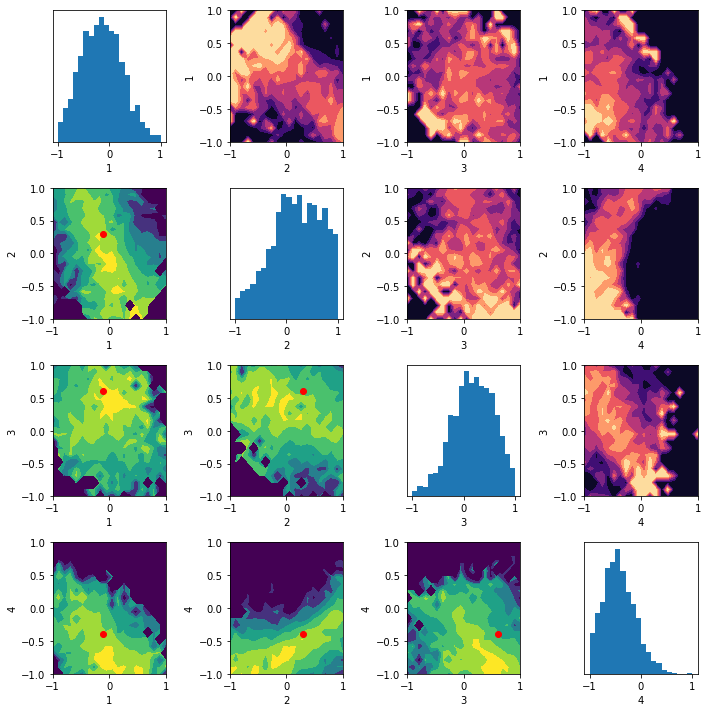

In [13]:
importlib.reload(plot)

fig, axes = plt.subplots(ndim,ndim,figsize=(10,10))
labels = ['1','2','3','4','5','6']
#plot.opticaldepth_1D(results.samples[0], parameter_bounds[0], parameter = 0, bins=20, Fig=(fig,ax1))
    
#plot.plot_implausibility2D(results.samples[0], parameter_bounds, [0,1], bins=20)

plot.plotcorner(results.samples[2], parameter_bounds, ndim, Fig=(fig,axes), labels=labels)
axes[1,0].scatter(true_parameters_5D[0],true_parameters_5D[1], color='red')
axes[2,0].scatter(true_parameters_5D[0],true_parameters_5D[2], color='red')
axes[3,0].scatter(true_parameters_5D[0],true_parameters_5D[3], color='red')
#axes[4,0].scatter(true_parameters_5D[0],true_parameters_5D[4], color='red')
axes[2,1].scatter(true_parameters_5D[1],true_parameters_5D[2], color='red')
axes[3,1].scatter(true_parameters_5D[1],true_parameters_5D[3], color='red')
#axes[4,1].scatter(true_parameters_5D[1],true_parameters_5D[4], color='red')
axes[3,2].scatter(true_parameters_5D[2],true_parameters_5D[3], color='red')
#axes[4,2].scatter(true_parameters_5D[2],true_parameters_5D[4], color='red')
#axes[4,3].scatter(true_parameters_5D[3],true_parameters_5D[4], color='red')

#axes[2,1].scatter(true_parameters_3D[1],true_parameters_3D[2], color='red')

#plt.savefig('6D.png')

In [14]:
def get_cov_ellipse(cov, centre, nstd, ax, color):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)
    
    width0, height0 = np.sqrt(np.abs(eigvals))

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(np.abs(eigvals))
    
    t = np.linspace(0, 2*np.pi, 100)
    Ell = np.array([0.5*width*np.cos(t) , 0.5*height*np.sin(t)]) 
    R_rot = np.array([[np.cos(theta) , -np.sin(theta)],[np.sin(theta), np.cos(theta)]])  
    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
    
    ax.plot( centre[0]+Ell_rot[0,:] , centre[1]+Ell_rot[1,:], color=color)
    
    return theta, width, height

In [15]:
analytic_mean = np.loadtxt("4D_analytic_mean.txt").reshape(4,)
analytic_cov = np.loadtxt("4D_analytic_cov.txt").reshape(4,4)


IndexError: list index out of range

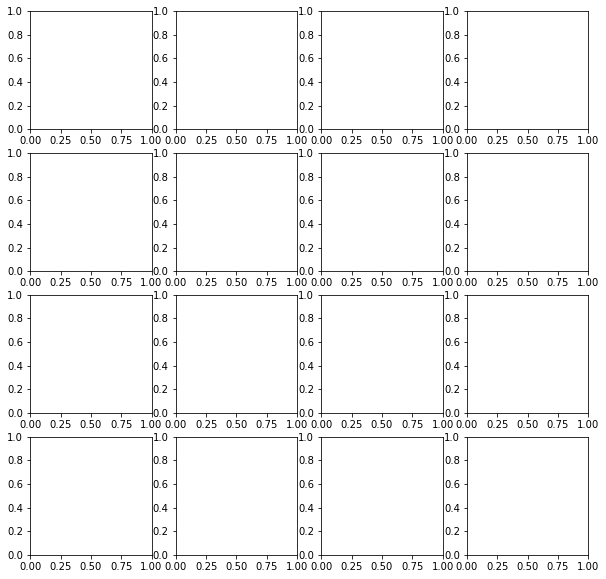

In [16]:
importlib.reload(plot)

fig, axes = plt.subplots(ndim,ndim,figsize=(10,10))
labels = ['1','2','3','4','5','6']
#plot.opticaldepth_1D(results.samples[0], parameter_bounds[0], parameter = 0, bins=20, Fig=(fig,ax1))
    
#plot.plot_implausibility2D(results.samples[0], parameter_bounds, [0,1], bins=20)

plot.plotcorner(results.samples[3], parameter_bounds, ndim, Fig=(fig,axes), labels=labels)

axes[1,0].scatter(true_parameters_5D[0],true_parameters_5D[1], color='red')
axes[2,0].scatter(true_parameters_5D[0],true_parameters_5D[2], color='red')
axes[3,0].scatter(true_parameters_5D[0],true_parameters_5D[3], color='red')

axes[2,1].scatter(true_parameters_5D[1],true_parameters_5D[2], color='red')
axes[3,1].scatter(true_parameters_5D[1],true_parameters_5D[3], color='red')

axes[3,2].scatter(true_parameters_5D[2],true_parameters_5D[3], color='red')


H = analytic_cov

get_cov_ellipse(np.array([[H[0,0], H[0,1]],[H[1,0], H[1,1]]]), [analytic_mean[0], analytic_mean[1]], 3, axes[1,0], 'red')
get_cov_ellipse(np.array([[H[0,0], H[0,2]],[H[2,0], H[2,2]]]), [analytic_mean[0], analytic_mean[2]], 3, axes[2,0], 'red')
get_cov_ellipse(np.array([[H[1,1], H[1,2]],[H[2,1], H[2,2]]]), [analytic_mean[1], analytic_mean[2]], 3, axes[2,1], 'red')
get_cov_ellipse(np.array([[H[0,0], H[0,3]],[H[3,0], H[3,3]]]), [analytic_mean[0], analytic_mean[3]], 3, axes[3,0], 'red')
get_cov_ellipse(np.array([[H[2,2], H[2,3]],[H[3,2], H[3,3]]]), [analytic_mean[2], analytic_mean[3]], 3, axes[3,2], 'red')
get_cov_ellipse(np.array([[H[1,1], H[1,3]],[H[3,1], H[3,3]]]), [analytic_mean[1], analytic_mean[3]], 3, axes[3,1], 'red')


#axes[1,0].scatter(true_parameters[0],true_parameters[1], color='red')
#axes[2,0].scatter(true_parameters[0],true_parameters[2], color='red')
#axes[2,1].scatter(true_parameters[1],true_parameters[2], color='red')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

mu = results.emulator_mu[0]
sd = results.emulator_sd[0]

ax1.scatter(results.test_pts[0][:,0], mu, s=2)

true = toy_model_5D(results.train_pts[0][:,0], results.train_pts[0][:,1], results.train_pts[0][:,2], results.train_pts[0][:,3], results.train_pts[0][:,4])[-1]

ax2.scatter(results.train_pts[0][:,0], true, s=10, color='red')
#ax2.scatter(results.train_pts[0][:,0], results.z_train[0], s=1, color='black')


ax1.fill_between(results.test_pts[0][:,0], mu + 3*sd, mu - 3*sd, alpha=0.2)
ax2.fill_between(results.train_pts[0][:,0], true + 3*np.sqrt(np.var(true)), true - 3*np.sqrt(np.var(true)), alpha=0.2)

##print(true - 3*np.sqrt(np.var(true)))
#ax2.scatter(results.train_pts[0][:,0], results.z_train[0], color='red')


#ax2.axhline(np.mean(results.z_train[0]) + 3*np.sqrt(np.var(results.train_pts[0][:,0])))
#ax2.axhline(np.mean(true) + 3*np.sqrt(np.var(true)))
#ax2.axhline(np.mean(results.z_train[0]), color='red')



In [ ]:
import GPy

rbf = GPy.kern.RBF(input_dim=5, variance=np.sqrt(np.var(results.z_train[0])), lengthscale=1.0)
m = GPy.models.GPRegression(results.train_pts[0], results.z_train[0].reshape(-1,1), rbf)
#m.optimize()
display(m)
# create simple GP model
meangpy, sdgpy = m.predict(results.test_pts[0])
 b b
meangpy = meangpy.reshape(5000,)
sdgpy = np.sqrt(sdgpy.reshape(5000,))

plt.scatter(results.train_pts[0][:,0], results.z_train[0], color='red')
plt.scatter(results.test_pts[0][:,0], meangpy, s=2)
plt.fill_between(results.test_pts[0][:,0], meangpy + 3*sdgpy, meangpy - 3*sdgpy, alpha=0.2)

In [ ]:
X_3D_train = np.random.uniform(-1, 1, (20, 3))

X_3D_test = np.random.uniform(-1, 1, (5000, 3))

rx, ry, rz = np.linspace(-1, 1, 20), np.linspace(-1, 1, 20), np.linspace(-1, 1, 20)
gx, gy, gz = np.meshgrid(rx, ry, rz)

X_3D = np.c_[gx.ravel(), gy.ravel(), gz.ravel()]

Y_3D_train = model_eqn_1(0.1, X_3D_train[:,0], X_3D_train[:,1], X_3D_train[:,2])

In [ ]:
Y_3D_test = model_eqn_1(0.1, X_3D_test[:,0], X_3D_test[:,1], X_3D_test[:,2])

In [ ]:
#print(Y_3D_test)

In [ ]:
importlib.reload(emulators)
GP = emulators.Gaussian_Process(X_3D_train, X_3D_test, Y_3D_train)
mu1, cov1, sd1 = GP.emulate()
print(GP.sigma_f)
#print(mu1)

In [ ]:
GP.optimize()

In [ ]:
mu2, cov2, sd2 = GP.emulate()
print(GP.l)

z = -0.06387078

In [ ]:
print(sd1[0])
print(sd2[0])
print(mu1 - Y_3D_test)
print(mu2 - Y_3D_test)

In [ ]:
HMtest = historymatch.HistoryMatch(z,
                               3, 'GP', 'ellipsoid')

In [ ]:
imp1 = HMtest.implausibility(mu1, z, sd1, 0, var_obs)
imp2 = HMtest.implausibility(mu2, z, sd2, 0, var_obs)
print(imp1)
print(imp2)

In [ ]:
samp1 = np.concatenate((X_3D_test, imp1.reshape(-1,1)), axis=1)
samp2 = np.concatenate((X_3D_test, imp2.reshape(-1,1)), axis=1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

plot.plot_implausibility2D(samp1, parameter_bounds, [0,1], bins=20, Fig=(fig, ax1), colorbar=False, 
                            labels=None, plot_kwargs=None)
plot.plot_implausibility2D(samp2, parameter_bounds, [0,1], bins=20, Fig=(fig, ax2), colorbar=False, 
                            labels=None, plot_kwargs=None)